In [277]:
%matplotlib inline

In [285]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.18.1.



Robust linear estimator fitting
===============================

Here a sine function is fit with a polynomial of order 3, for values
close to zero.

Robust fitting is demoed in different situations:

- No measurement errors, only modelling errors (fitting a sine with a
  polynomial)

- Measurement errors in X

- Measurement errors in y

The median absolute deviation to non corrupt new data is used to judge
the quality of the prediction.

What we can see that:

- RANSAC is good for strong outliers in the y direction

- TheilSen is good for small outliers, both in direction X and y, but has
  a break point above which it performs worse than OLS.

- The scores of HuberRegressor may not be compared directly to both TheilSen
  and RANSAC because it does not attempt to completely filter the outliers
  but lessen their effect.




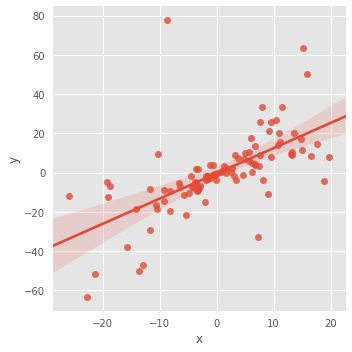

In [278]:
from matplotlib import pyplot as plt
import numpy as np
import glob
import pandas as pd
import seaborn as sns



from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, BayesianRidge, ARDRegression,
    LassoLars, Lasso, ElasticNet, Ridge)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)


##### 3. Load the data
#get a list of all the data files provided
data_files = glob.glob("Voleon/Problem1/*csv")
# create a data frame using all five csv files
data_tot = pd.concat(map(pd.read_csv, data_files))
# just a check of the dimensions of the data frame and how first five rows look like
data_tot.shape
#data_tot.head()


#### 4. Extract x and y
train1=pd.read_csv('Voleon/Problem1/data_1_1.csv')
train2=pd.read_csv('Voleon/Problem1/data_1_2.csv')
train3=pd.read_csv('Voleon/Problem1/data_1_3.csv')
train4=pd.read_csv('Voleon/Problem1/data_1_4.csv')
train5=pd.read_csv('Voleon/Problem1/data_1_5.csv')


#ONLY train 1 so far
X = train1[['x']]
y = train1[['y']]


X_test = X
y_test = y

sns.lmplot(x='x', y='y', data=train2)

X.min() x   -4.866097
dtype: float64
X.max() x    4.919061
dtype: float64
working with data_1_1.csv
Model OLS has mse=28.0367083675
a.shape (1, 2)
a=0.880808786116, b=-0.26952650609
Model Lasso has mse=28.1777807629
a.shape (2,)
a=0.739736390802, b=-0.24434922441
Model Ridge has mse=28.0367192815
a.shape (1, 2)
a=0.879567958528, b=-0.269305054787
Model ElasticNet has mse=28.1455684417
a.shape (2,)
a=0.756884811773, b=-0.247409714197
Model BayesianRidge has mse=28.0512822654
a.shape (2,)
a=0.835465929156, b=-0.261434137067
Model ARDRegression has mse=28.0512822654
a.shape (2,)
a=0.835465929156, b=-0.261434137067
Model Theil-Sen has mse=28.2497511626
a.shape (2,)
a=1.0384963991, b=-0.0528700319337
Model RANSAC has mse=31.4594902964
a.shape (1, 2)
a=1.55307960777, b=0.0785969860963
Model HuberRegressor has mse=28.2583958971
a.shape (2,)
a=1.05759467775, b=-0.14447726535


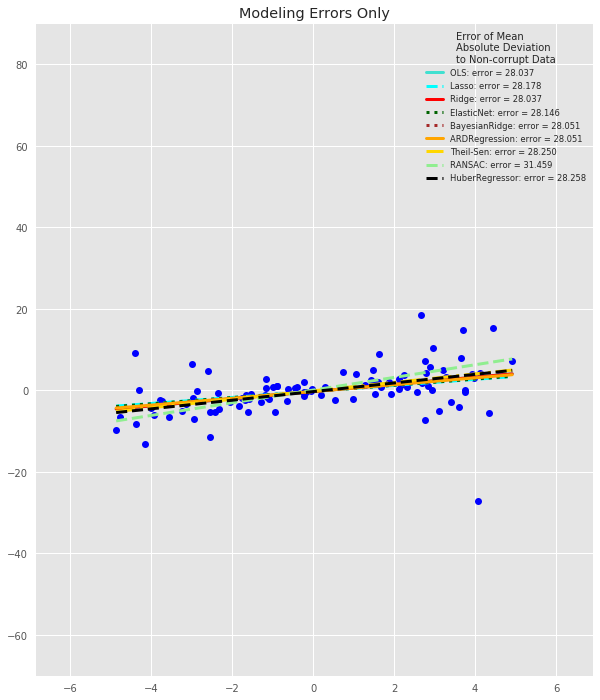

working with data_1_2.csv
Model OLS has mse=29.2011531543
a.shape (1, 2)
a=1.28560303348, b=-0.395853392601
Model Lasso has mse=29.1413250879
a.shape (2,)
a=1.27509834134, b=-0.390877822725
Model Ridge has mse=29.2003740358
a.shape (1, 2)
a=1.28546799902, b=-0.395789433243
Model ElasticNet has mse=29.1332619554
a.shape (2,)
a=1.27366097918, b=-0.390197013063
Model BayesianRidge has mse=29.0905699125
a.shape (2,)
a=1.26596053791, b=-0.386549682605
Model ARDRegression has mse=29.0905699125
a.shape (2,)
a=1.26596053791, b=-0.386549682605
Model Theil-Sen has mse=29.4292121071
a.shape (2,)
a=1.29720139068, b=-0.374077002753
Model RANSAC has mse=28.1623672399
a.shape (1, 2)
a=0.788069465136, b=0.00137320573239
Model HuberRegressor has mse=29.0340597213
a.shape (2,)
a=1.16815435251, b=-0.481373942288


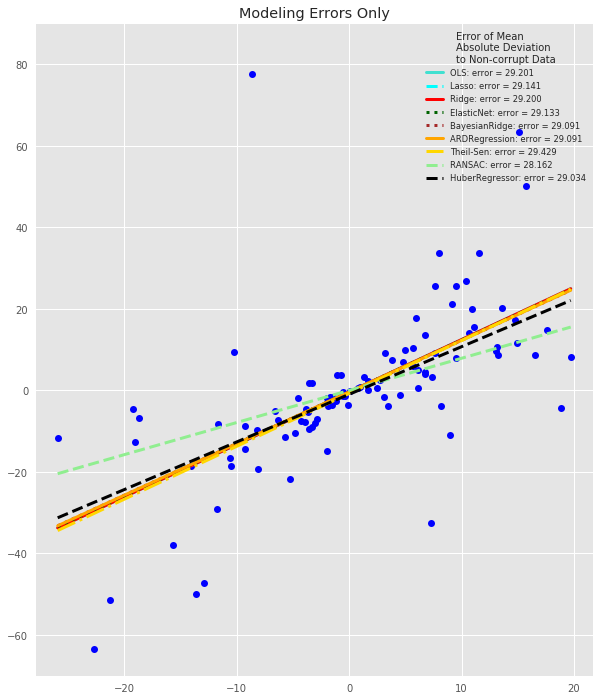

working with data_1_3.csv
Model OLS has mse=59.8716926841
a.shape (1, 2)
a=-0.537849568852, b=4.17515500126
Model Lasso has mse=59.7486284199
a.shape (2,)
a=-0.52965798656, b=4.17860645259
Model Ridge has mse=59.870363782
a.shape (1, 2)
a=-0.537761466506, b=4.17519212241
Model ElasticNet has mse=59.7773618713
a.shape (2,)
a=-0.531576551174, b=4.17779808222
Model BayesianRidge has mse=58.5014815875
a.shape (2,)
a=-0.442525687359, b=4.21531888243
Model ARDRegression has mse=58.5014815875
a.shape (2,)
a=-0.442525687359, b=4.21531888243
Model Theil-Sen has mse=44.8235980518
a.shape (2,)
a=-0.632807661859, b=0.3700190939
Model RANSAC has mse=39.4660699377
a.shape (1, 2)
a=-0.307553595743, b=1.13372124213
Model HuberRegressor has mse=46.0723997545
a.shape (2,)
a=-0.59512960041, b=0.802269973483


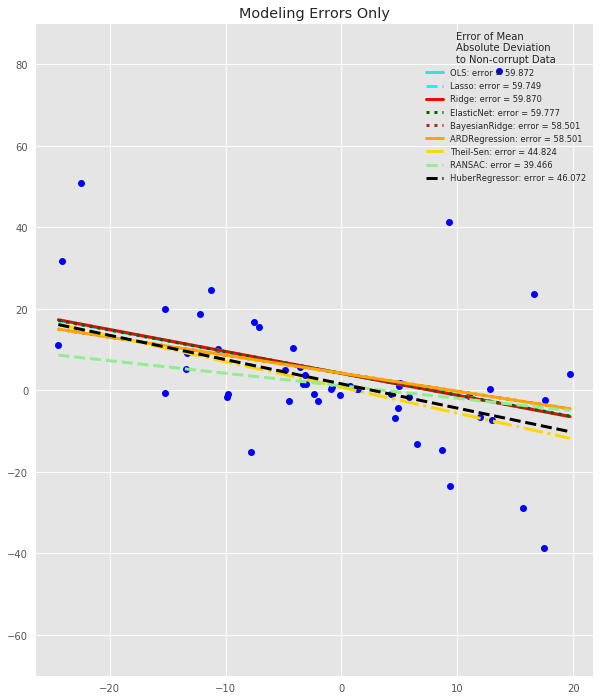

working with data_1_4.csv
Model OLS has mse=30.3571901332
a.shape (1, 2)
a=0.633375550627, b=1.14813131855
Model Lasso has mse=38.9562599631
a.shape (2,)
a=0.0841285128733, b=2.40651764255
Model Ridge has mse=30.4218176185
a.shape (1, 2)
a=0.626493556031, b=1.16389873701
Model ElasticNet has mse=35.0646610315
a.shape (2,)
a=0.281457251053, b=1.95441545831
Model BayesianRidge has mse=36.9485997972
a.shape (2,)
a=0.180231378477, b=2.18633524108
Model ARDRegression has mse=36.9485997972
a.shape (2,)
a=0.180231378477, b=2.18633524108
Model Theil-Sen has mse=29.0792528139
a.shape (2,)
a=1.19898316654, b=0.121859539309
Model RANSAC has mse=30.8519091756
a.shape (1, 2)
a=1.51093362092, b=-0.407217231103
Model HuberRegressor has mse=28.8606573596
a.shape (2,)
a=1.15823338913, b=0.104295260662


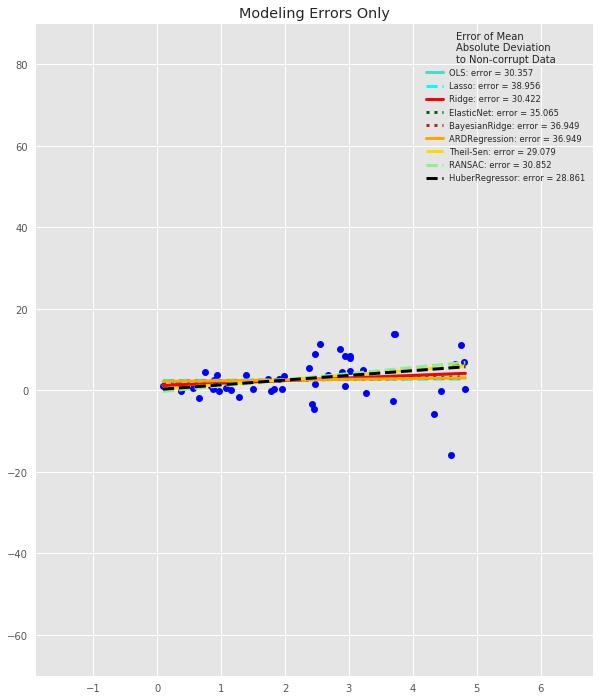

working with data_1_5.csv
Model OLS has mse=62.9141475266
a.shape (1, 2)
a=-1.33306888476, b=-0.241304630759
Model Lasso has mse=61.6552087563
a.shape (2,)
a=-1.29610205984, b=-0.042995223601
Model Ridge has mse=62.8792672852
a.shape (1, 2)
a=-1.33208402642, b=-0.236021334887
Model ElasticNet has mse=61.480807532
a.shape (2,)
a=-1.29072840678, b=-0.0141681346047
Model BayesianRidge has mse=60.6245819098
a.shape (2,)
a=-1.26329797338, b=0.132983074566
Model ARDRegression has mse=60.6245819098
a.shape (2,)
a=-1.26329797338, b=0.132983074565
Model Theil-Sen has mse=52.9958695722
a.shape (2,)
a=-0.994937420821, b=-0.0355827335809
Model RANSAC has mse=56.7323905662
a.shape (1, 2)
a=-1.1248887437, b=-0.335439710526
Model HuberRegressor has mse=54.4541040678
a.shape (2,)
a=-1.04942288654, b=-0.0039989055772


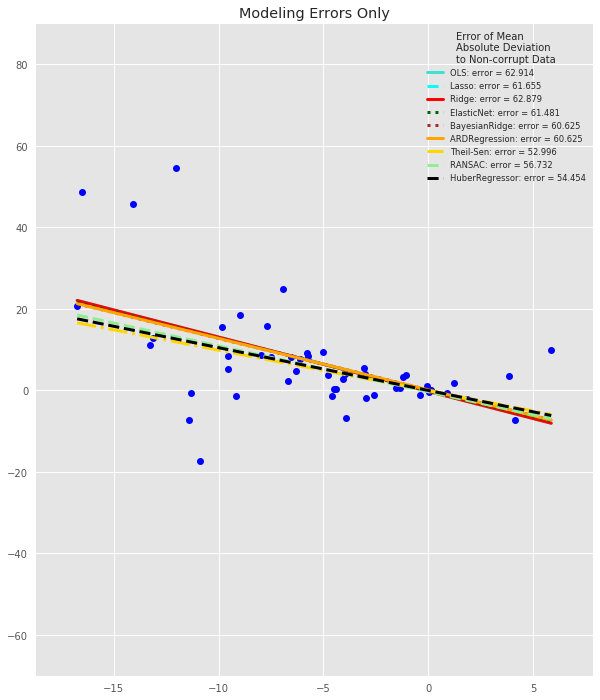


[['data_1_1.csv', 'OLS', '0.880808786116', '-0.26952650609'],
 ['data_1_1.csv', 'Lasso', '0.739736390802', '-0.24434922441'],
 ['data_1_1.csv', 'Ridge', '0.879567958528', '-0.269305054787'],
 ['data_1_1.csv', 'ElasticNet', '0.756884811773', '-0.247409714197'],
 ['data_1_1.csv', 'BayesianRidge', '0.835465929156', '-0.261434137067'],
 ['data_1_1.csv', 'ARDRegression', '0.835465929156', '-0.261434137067'],
 ['data_1_1.csv', 'Theil-Sen', '1.0384963991', '-0.0528700319337'],
 ['data_1_1.csv', 'RANSAC', '1.55307960777', '0.0785969860963'],
 ['data_1_1.csv', 'HuberRegressor', '1.05759467775', '-0.14447726535'],
 ['data_1_2.csv', 'OLS', '1.28560303348', '-0.395853392601'],
 ['data_1_2.csv', 'Lasso', '1.27509834134', '-0.390877822725'],
 ['data_1_2.csv', 'Ridge', '1.28546799902', '-0.395789433243'],
 ['data_1_2.csv', 'ElasticNet', '1.27366097918', '-0.390197013063'],
 ['data_1_2.csv', 'BayesianRidge', '1.26596053791', '-0.386549682605'],
 ['data_1_2.csv', 'ARDRegression', '1.26596053791', '-0.

In [283]:
import re, ast
import csv
from pprint import pprint as pp



estimators = [('OLS', LinearRegression()),
              
              ('Lasso', Lasso()), 
              ('Ridge', Ridge()),
              ('ElasticNet', ElasticNet()), 
            
              ('BayesianRidge', BayesianRidge()),
              ('ARDRegression', ARDRegression()),
              
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]


colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black', 
          'BayesianRidge': 'brown', 'ARDRegression': 'orange', 
          'LassoLars' : 'pink', 'Lasso': 'cyan', 'ElasticNet' : 'darkgreen', 'Ridge': 'red'}

linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--', 'BayesianRidge': ':', 'ARDRegression': '-',
            'LassoLars' : '-.', 'Lasso': '--', 'ElasticNet' : ':', 'Ridge': '-'}
lw = 3

print 'X.min()', X.min()
print 'X.max()', X.max()


list_of_results = []

def run_one_sample(sample, file_name):
    X = sample[['x']]
    y = sample[['y']]
    for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ]:

        x_plot = np.linspace(this_X.min(), this_X.max())

        plt.figure(figsize=(10, 12))
        plt.plot(this_X, this_y, 'bo')
        RANSACworked = False
        for name, estimator in estimators:
            model = make_pipeline(PolynomialFeatures(1), estimator)
            if name == 'RANSAC':
                try:
                    inlier_mask = estimator.inlier_mask_
                    outlier_mask = np.logical_not(inlier_mask)
                    RANSACworked = True
                except:
                    pass

            model.fit(this_X, this_y)
            mse = mean_squared_error(model.predict(X_test), y_test)
            y_plot = model.predict(x_plot[:, np.newaxis])
            plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                     linewidth=lw, label='%s: error = %.3f' % (name, mse))

            print 'Model {0} has mse={1}'.format (name, mse)
            #print model.named_steps
            if 'RANSAC' in name:
                a = model.steps[1][1].estimator_.coef_
                b = model.steps[1][1].estimator_.intercept_
            else:
                a = model.steps[1][1].coef_
                b = model.steps[1][1].intercept_


            print "a.shape", a.shape
            if name in ["OLS", "Ridge", "RANSAC"]:
                a = a[0][1]
                b = b[0]
            elif name in ["Lasso", "ElasticNet"]:
                a = a[1]
                b = b[0]
            else:
                a = a[1]
            print "a={0}, b={1}".format(a, b)
            list_of_results.append([file_name, name, str(a), str(b)])


        legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
        legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                            prop=dict(size='small'))

        if False:
            plt.scatter(this_X[inlier_mask], this_y[inlier_mask], color='yellowgreen', marker='.',
                label='Inliers')
            plt.scatter(this_X[outlier_mask], this_y[outlier_mask], color='gold', marker='.',
                label='Outliers')

        plt.title(title)
        plt.xlim(x_plot.min()-2, x_plot.max()+2)
        plt.ylim(-70, 90)

        #plt.xlim(-25, -20)
        #plt.ylim(-10, 0)
        #break




    plt.show()
    
    
    
for idx, sample in enumerate([train1, train2, train3, train4, train5], start =1):
    file_name = "data_1_{0}.csv".format(idx)
    print 'working with', file_name
    run_one_sample(sample, file_name)

print 
pp(list_of_results)

In [280]:
sep = "\t\t"
with open('results.csv', 'w') as csv:
    csv.write(sep.join("{:10}".format(x) for x in ["File name", "Method", "a", "b"]))
    csv.write("\n\n")

    for row in list_of_results:
        csv.write(sep.join("{:10}".format(x) for x in row))
        csv.write("\n")

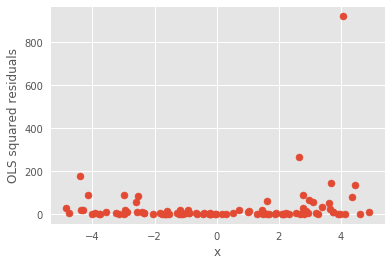

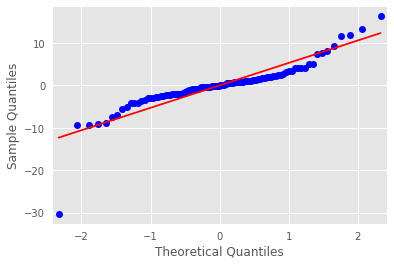

In [281]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


aggregated_data = train1
def residual_plots():
    
    ''' Plots the OLS residuals vs predictors. Also plots a QQ plot of 
    residuals'''
    
    plt.style.use('ggplot')
    
    lm_ols = smf.ols(formula='y ~ x', data=aggregated_data).fit() # OLS fit
    
    #---------------------------------------------
    # Scatter plot of OLS residuals vs predictors
    #---------------------------------------------
    #plt.scatter(aggregated_data['x'].values, lm_ols.resid)
    plt.scatter(aggregated_data['x'].values, lm_ols.resid**2)
    plt.xlabel('x')
    plt.ylabel('OLS squared residuals')
    plt.savefig('squared_residuals_scatterplot.pdf')
    plt.show()
    
    #----------------------
    ## QQ plot of residuals
    #----------------------
    fig = sm.qqplot(lm_ols.resid, line='s')
    #fig.savefig('residuals_QQplot.pdf')
    plt.show(fig)
residual_plots()